Reference: https://garba.org/posts/2022/graph/

# Base Imports and Boilerplate

In [1]:
# !pip install scipy

In [2]:
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import pandas as pd
import warnings
from IPython.display import Image, Markdown, display
import warnings
import sys
import os
import scipy

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

In [3]:
def visualize(graph,hide=False,clusters=None,circular=False):
    layout = "circo" if circular else "dot"
    oneblock = True if circular else False
    G = pgv.AGraph(strict=False, directed=graph.is_directed(),
                    rankdir="LR",newrank="True",layout=layout,oneblock=oneblock)

    targetGraph = {}

    if clusters is not None:
        for (label,cluster) in clusters:
            name = "cluster_%s" % label.lower().replace(" ","_")
            subgraph = G.add_subgraph(name=name,label=label,labelloc="b",rank="same")
            for node in cluster:
                targetGraph[node] = subgraph
    else:
        for n in graph.nodes():
            targetGraph[n] = G

    for (n,data) in graph.nodes(data=True):
        label = "%s " % n
        for attribute,value in data.items():
            if not hide:
                label +=  "\n%s = " % attribute
            label += "\n%s," % value
        if len(label) > 1:
            label = label[0:-1]
        targetGraph[n].add_node(n,label=label)
    for (u,v,data) in graph.edges(data=True):

        dir = 'forward' if graph.is_directed() else 'none'
        label = ""
        for attribute,value in data.items():
            if not hide:
                label +=  " %s = " % attribute
            label += "%s," % value
        if len(label) > 1:
            label = label[0:-1]
        G.add_edge(u,v,dir=dir,label=label)
        G.layout(prog="dot")
    display(Image(G.draw(format='png')))
    return

# Fundamental Graph Structures

- <b>Edges</b>: This is what a connection is called in graph theory. An edge is the same as an link, or a relationship. You may also call them arrows but such a notion is rather specific to directed graphs because arrows “point” somewhere.
- <b>Nodes</b>: Nodes are simply the subjects in a connection. A node is the same as an object. If you have an edge, you have at least a node (if pointing to itself), or two nodes, if you are connecting two different subjects.

## Undirected Graph

In an undirected graph, the nodes connect the nodes equally without distinction in terms of from/to. There is no sense of direction. For example, when you say “Joe is married to Mary” it would be a contradiction to say “but Mary is not married to Joe”. In an undirected graph, all relationships are mutual or two-way

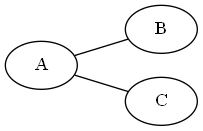

In [4]:
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('A','C')
visualize(G)

## Directed Graph

When people think about graphs, they are likely to think about a directed one. In a <b>directed graph</b>, the edges connect the nodes in a explicit direction such as from node A to node B, but not from node B to node A—unless this connection is added as a new edge. In the visualisation, we typically use an arrow to denote the direction of each edge.

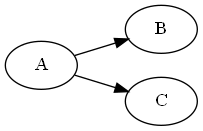

In [5]:
G = nx.DiGraph()
G.add_edge('A','B')
G.add_edge('A','C')
visualize(G)

## Multigraph

A multigraph graph is a type of graph in which a pair of nodes can have multiple relationships simultaneously.

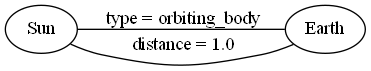

In [6]:
# There is also nx.MultiDiGraph() for directed graphs
G = nx.MultiGraph()
G.add_edge('Sun','Earth',type='orbiting_body')
G.add_edge('Sun','Earth',distance=1.0)
visualize(G)

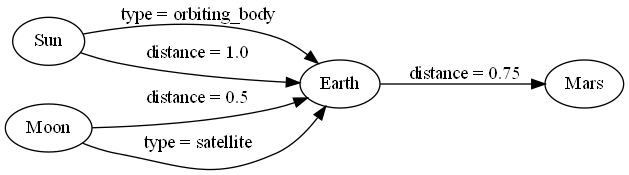

In [7]:
# There is also nx.MultiDiGraph() for directed graphs
G1 = nx.MultiDiGraph()
G1.add_edge('Sun','Earth',type='orbiting_body')
G1.add_edge('Sun','Earth',distance=1.0)
G1.add_edge('Moon','Earth',distance=0.5)
G1.add_edge('Moon','Earth',type='satellite')
G1.add_edge('Earth','Mars',distance=0.75)
visualize(G1)

Multigraphs introduce the problem of rendering ambiguous the identity of a given edge. Networkx implicitly assigns a key number to each new edge

In [8]:
G = nx.MultiGraph()
G.add_edge('Sun','Earth',type='orbiting_body') # Key 0
G.add_edge('Sun','Earth',distance=1.0)         # Key 1
print(G.nodes())                               # Get all the nodes in the graph. Note the call to MultiGraph()
print(G['Sun']['Earth'])                       # The entire key-value pair in the graph
print(G['Sun']['Earth'][0])                    # Get edge with Key 0
print(G['Sun']['Earth'][1])                    # Get edge with Key 1

['Sun', 'Earth']
{0: {'type': 'orbiting_body'}, 1: {'distance': 1.0}}
{'type': 'orbiting_body'}
{'distance': 1.0}


In [9]:
G1 = nx.MultiDiGraph()
G1.add_edge('Sun','Earth',type='orbiting_body') # Key 0
G1.add_edge('Sun','Earth',distance=1.0)         # Key 1
G1.add_edge('Moon','Earth',distance=0.5)        # Key 0
G1.add_edge('Moon','Earth',type='satellite')    # Key 1
G1.add_edge('Earth','Mars',distance=0.75)       # Key 0
print(G1.nodes())                               # All the nodes in the graph. Note the call to MultiDiGraph()
print(G1.edges(data=True))                      # ALL edges in the graph
print('====================')
print(G1['Sun']['Earth'])                       # The entire key-value Sun-Earth pair
print(G1['Sun']['Earth'][0])                    # Get edge with Key 0
print(G1['Sun']['Earth'][1])                    # Get edge with Key 1
print('====================')
print(G1['Moon']['Earth'])                      # The entire key-value Sun-Earth pair
print(G1['Moon']['Earth'][0])                   # Get edge with Key 0
print(G1['Moon']['Earth'][1])                   # Get edge with Key 1
print('====================')
print(G1['Earth']['Mars'])                      # The entire key-value Sun-Earth pair
print(G1['Earth']['Mars'][0])                   # Get edge with Key 0
# print(G1['Mars']['Earth'][0])                 # Get edge with Key 1 # Key error because node order is changed!!!!
# print(G1['Earth']['Mars'][1])                 # This will give a KeyError because there no data for index=1

['Sun', 'Earth', 'Moon', 'Mars']
[('Sun', 'Earth', {'type': 'orbiting_body'}), ('Sun', 'Earth', {'distance': 1.0}), ('Earth', 'Mars', {'distance': 0.75}), ('Moon', 'Earth', {'distance': 0.5}), ('Moon', 'Earth', {'type': 'satellite'})]
{0: {'type': 'orbiting_body'}, 1: {'distance': 1.0}}
{'type': 'orbiting_body'}
{'distance': 1.0}
{0: {'distance': 0.5}, 1: {'type': 'satellite'}}
{'distance': 0.5}
{'type': 'satellite'}
{0: {'distance': 0.75}}
{'distance': 0.75}


We may, however, specify that key number explicitly, so that we can consistently discriminate different sets of edge types. Here below, for instance, we specify that the edge for type will have key=1, and the edge for distance will have key=0—effectively reversing the order seen in the last example.

In [10]:
G = nx.MultiGraph()
G.add_edge('Sun','Earth',type='orbiting_body', key=1) 
G.add_edge('Sun','Earth',distance=1.0        , key=0)
print(G['Sun']['Earth'][0])                    
print(G['Sun']['Earth'][1])                    

{'distance': 1.0}
{'type': 'orbiting_body'}


Specific attributes may be queried using the dictionary syntax or the underlying Networkx’s method

In [11]:
print(G['Sun']['Earth'][1]['type'])
print(G.get_edge_data('Sun', 'Earth',key=1)['type'])

orbiting_body
orbiting_body


## Disconnected Graphs

If the nodes contained in a graph cannot be reached by navigating the defined edges, then the graph is said to be disconnected.

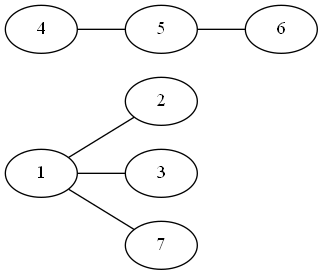

Connected: False


In [12]:
G = nx.Graph()
G.add_edges_from([(1,2),
                  (1,3),
                  (1,7),
                  (4,5),
                  (5,6)
                ])
visualize(G)
print("Connected: %s" % nx.is_connected(G)) 

We can also obtain the so-called connected components which are the subsets of the input graph that are connected graphs

In [13]:
print("Connected components #%d " % nx.number_connected_components(G))
print("Components: %s" % list(nx.connected_components(G)))
print("Component in which node 2 is found: %s" % list(nx.node_connected_component(G,2)))
print("Length of the list of components: %s" % len(list(nx.connected_components(G))))

for element in list(nx.connected_components(G)):
    print(element, type(element), len(element))

print(max(list(nx.connected_components(G))))      # The largest component
print(len(max(list(nx.connected_components(G))))) # Length of the largest component

Connected components #2 
Components: [{1, 2, 3, 7}, {4, 5, 6}]
Component in which node 2 is found: [1, 2, 3, 7]
Length of the list of components: 2
{1, 2, 3, 7} <class 'set'> 4
{4, 5, 6} <class 'set'> 3
{1, 2, 3, 7}
4


## Strongly and Weakly Connected Graphs

A directed graph is <b>strongly connected</b> if and only if every node in the graph is reachable from every other node. This is not true for the example below. This graph is <b>weakly connected</b>, that is, if the the graph were to be an undirected one, it would be fully connected.

Note that the nodes {3, 4, 6} are strongly connected. We can obtain the set of strongly connected nodes using the strongly_connected_components() method.

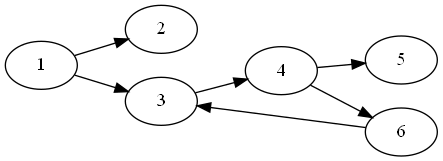

Strongly connected: False
Weakly connected: True
strongly_Connected components: [{2}, {5}, {3, 4, 6}, {1}]
Weakly_Connected components: [{1, 2, 3, 4, 5, 6}]
Number of Strongly connected components: 4
Number of Weakly connected components: 1


In [14]:
G = nx.DiGraph()
G.add_edges_from([(1,2),
                  (1,3),
                  (3,4),
                  (4,5),
                  (4,6),
                  (6,3)
                ])
visualize(G)
print("Strongly connected: %s" % nx.is_strongly_connected(G))
print("Weakly connected: %s" % nx.is_weakly_connected(G))
print("strongly_Connected components: %s" % list(nx.strongly_connected_components(G)))
print("Weakly_Connected components: %s" % list(nx.weakly_connected_components(G)))
print("Number of Strongly connected components: %s" % len(list(nx.strongly_connected_components(G))))
print("Number of Weakly connected components: %s" % len(list(nx.weakly_connected_components(G)))) 

Let’s now fix it by ensuring that every node can be reached from any other node

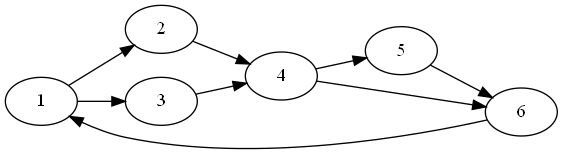

Strongly connected: True
Strongly connected: True
Weakly connected: True
strongly_Connected components: [{1, 2, 3, 4, 5, 6}]
Weakly_Connected components: [{1, 2, 3, 4, 5, 6}]
Number of Strongly connected components: 1
Number of Weakly connected components: 1


In [15]:
G = nx.DiGraph()
G.add_edges_from([(1,2),
                  (2,4),
                  (1,3),
                  (3,4),
                  (4,5),
                  (5,6),
                  (4,6),
                  (6,1)
                ])
visualize(G)
print("Strongly connected: %s" % nx.is_strongly_connected(G))
print("Strongly connected: %s" % nx.is_strongly_connected(G))
print("Weakly connected: %s" % nx.is_weakly_connected(G))
print("strongly_Connected components: %s" % list(nx.strongly_connected_components(G)))
print("Weakly_Connected components: %s" % list(nx.weakly_connected_components(G)))
print("Number of Strongly connected components: %s" % len(list(nx.strongly_connected_components(G))))
print("Number of Weakly connected components: %s" % len(list(nx.weakly_connected_components(G)))) 

Use of Edge and Node Attributes
- Weighted Graph
- Signed Graph
- Multiple Edge Attributes
- Node Attributes

# Use of Edge and Node Attributes

## Weighted Graph

A <b>weighted graph</b> is not a fundamentally different graph type except for the fact that edges are associated with a weight attribute which may be used to treat edges differently—i.e., higher or lower—depending on their weight.

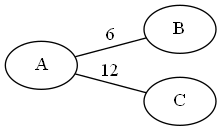

In [16]:
G = nx.Graph()
G.add_edge('A','B',weight=6)
G.add_edge('A','C',weight=12)
visualize(G,hide=True)

## Signed Graph

A <b>signed graph</b> is one in which the edges signal either a positive or negative relationship.

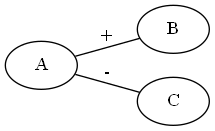

In [17]:
G = nx.Graph()
G.add_edge('A','B', sign='+')
G.add_edge('A','C', sign='-')
visualize(G,hide=True)

## Multiple Edge Attributes

Edges may have one or more attributes associated with them

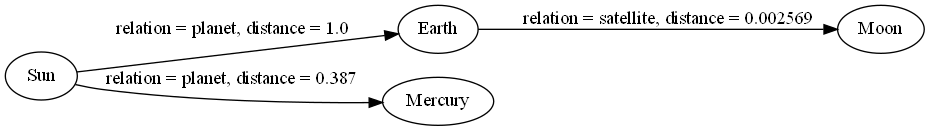

['Sun', 'Earth', 'Mercury', 'Moon']
[('Sun', {}), ('Earth', {}), ('Mercury', {}), ('Moon', {})]
[('Sun', 'Earth', {'relation': 'planet', 'distance': 1.0}), ('Sun', 'Mercury', {'relation': 'planet', 'distance': 0.387}), ('Earth', 'Moon', {'relation': 'satellite', 'distance': 0.002569})]


In [18]:
# Distance is in astronomical units (AU)
G = nx.DiGraph()
G.add_edge('Sun','Earth', relation='planet',distance=1.0)
G.add_edge('Sun','Mercury', relation='planet',distance=0.387)
G.add_edge('Earth','Moon', relation='satellite',distance=0.002569)
visualize(G)

print(G.nodes)
print(G.nodes(data=True))
print(G.edges(data=True))

## Node Attributes

Nodes, like edges, may also have attributes. In the example below, we add a mass attribute to each node

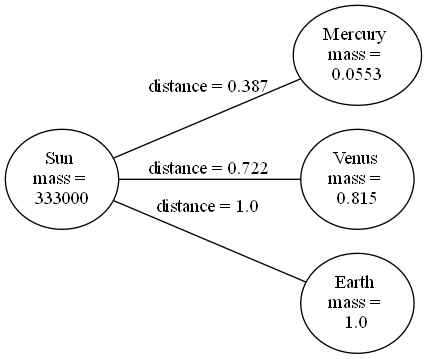

['Sun', 'Mercury', 'Venus', 'Earth']
[('Sun', {'mass': 333000}), ('Mercury', {'mass': 0.0553}), ('Venus', {'mass': 0.815}), ('Earth', {'mass': 1.0})]


In [19]:
G = nx.Graph()
G.add_edge('Sun','Mercury', distance=0.387)
G.add_edge('Sun','Venus'  , distance=0.722)
G.add_edge('Sun','Earth'  , distance=1.0)
# Node-wise attributes (in addition to edge-wise ones)
G.add_node('Sun',     mass=333000)
G.add_node('Mercury', mass=0.0553)
G.add_node('Venus',   mass=0.815)
G.add_node('Earth',   mass=1.0)
visualize(G)

print(G.nodes)
print(G.nodes(data=True))

Querying nodes’ attributes involves obtaining the nodes dictionary via nodes():

In [20]:
print(G.nodes())              # Show all nodes
print(G.nodes(data=True))     # Show all nodes with their attributes
print(G.nodes['Sun'])         # Show node and its attribute
print(G.nodes['Sun']['mass']) # Show node's specific attribute 

['Sun', 'Mercury', 'Venus', 'Earth']
[('Sun', {'mass': 333000}), ('Mercury', {'mass': 0.0553}), ('Venus', {'mass': 0.815}), ('Earth', {'mass': 1.0})]
{'mass': 333000}
333000


# Bipartite Graphs

<b>Bipartite graphs—also called bigraphs</b>—are graphs whose nodes can be unambiguously divided into two <i>disjoint sets U and V—also called bottom and top—</i>. Bipartite graphs are characterized by lacking odd cycles. Trees are an example of bipartite graphs.

## Inductive Examples

### 1 Edge, 1 Node

We require at least two distinct nodes to create two disjoint sets.

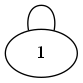

Bipartite: False

In [21]:
G = nx.Graph()
G.add_edges_from([(1,1)])
visualize(G)
display(Markdown("Bipartite: %s" % bipartite.is_bipartite(G)))

### 1 Edge, 2 Nodes

We require at least two distinct nodes to create two disjoint sets.

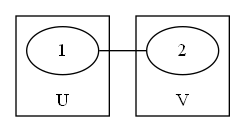

Bipartite: True

U = {1}, V = {2}

In [22]:
G = nx.Graph()
G.add_edges_from([(1,2)])
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])
display(Markdown("Bipartite: %s" % bipartite.is_bipartite(G)))
display(Markdown("U = %s, V = %s" % (U, V)))

### 2 Edges, 3 Nodes As a Sequence

We have not created an odd cycle.

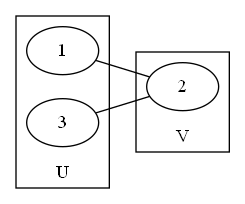

Bipartite: True

U = {1, 3}, V = {2}

In [23]:
G = nx.Graph()
G.add_edges_from([(1,2)])
G.add_edges_from([(2,3)])
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])
display(Markdown("Bipartite: %s" % bipartite.is_bipartite(G)))
display(Markdown("U = %s, V = %s" % (U, V)))

### 2 Edges, 3 Nodes As a Tree

We have not created an odd cycle.

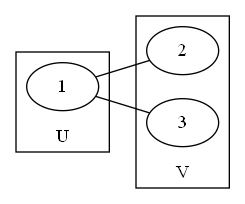

Bipartite: True

U = {1}, V = {2, 3}

In [24]:
G = nx.Graph()
G.add_edges_from([  (1,2),
                    (1,3)
                ])
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])
display(Markdown("Bipartite: %s" % bipartite.is_bipartite(G)))
display(Markdown("U = %s, V = %s" % (U, V)))

### 3 Edges, 3 Nodes As a Triad

We have created an odd cycle.

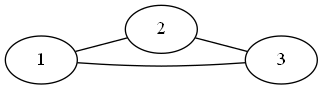

Bipartite: False

In [25]:
G = nx.Graph()
G.add_edges_from([  (1,2),
                    (1,3),
                    (2,3)
                ])
visualize(G)
display(Markdown("Bipartite: %s" % bipartite.is_bipartite(G)))

### 4 Edges, 4 Nodes as a Square (Yes)

Here, the cycle between 1, 2, 3, and 4 forming a square may seem strange—as being a valid bipartite graph—but we can see that the odd and even numbers never connect directly, forming two separate disjoint sets.

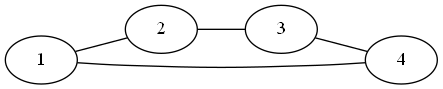

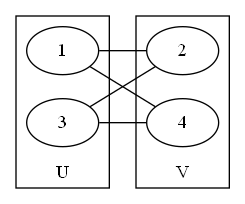

Bipartite: True

U = {1, 3}, V = {2, 4}

In [26]:
G = nx.Graph()
G.add_edges_from([  (1,2),
                    (2,3),
                    (3,4),
                    (4,1)
                ])

visualize(G)                
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])
display(Markdown("Bipartite: %s" % bipartite.is_bipartite(G)))
display(Markdown("U = %s, V = %s" % (U, V)))

## Bipartite Node Set Membership

Given a set of nodes, we can check whether those nodes belong to one of the two disjoint sets found in a bipartite graph:

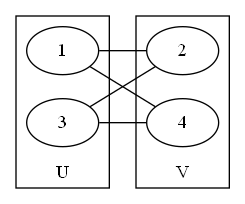

True
True
False
False


In [27]:
G = nx.Graph()
G.add_edges_from([  (1,2),
                    (2,3),
                    (3,4),
                    (4,1)
                ])
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])

print(bipartite.is_bipartite_node_set(G,[1,3])) # True, nodes in set U
print(bipartite.is_bipartite_node_set(G,[2,4])) # True, nodes in set V
print(bipartite.is_bipartite_node_set(G,[2,1])) # False
print(bipartite.is_bipartite_node_set(G,[2,3])) # False

## Projected Graph

A regular projected graph consists of a graph which connects the inputs nodes with those nodes in the same set which are connected through a common node. In the below example, we try to match people who like the same food

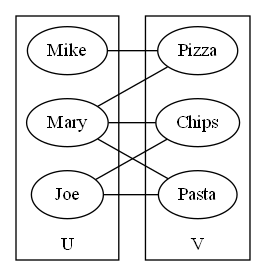

Those who like to eat what Joe likes

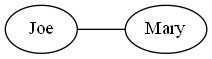

Those who like to eat what Mary likes

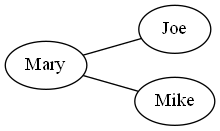

Those who like to eat what Mike and Mary like

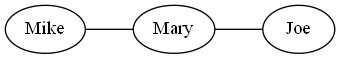

In [28]:
G = nx.Graph()
G.add_edges_from([  ('Mary','Pizza'),
                    ('Mary','Pasta'),
                    ('Mary','Chips'),
                    ('Pizza','Mike'),
                    ('Pasta','Joe'),
                    ('Joe','Chips'),
                ])
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])

display(Markdown("Those who like to eat what Joe likes"))
visualize(bipartite.projected_graph(G,['Joe']))

display(Markdown("Those who like to eat what Mary likes"))
visualize(bipartite.projected_graph(G,['Mary']))

display(Markdown("Those who like to eat what Mike and Mary like"))
visualize(bipartite.projected_graph(G,['Mike','Mary']))

## Weighted Projection

The weighted projection, relative to the regular one, adds an additional attribute weight to every edge which reflects how many nodes in common each neighbour has.

In the below example, the edge ('Mary','Mike') has weight = 1 because they only have Pizza in common as a favourite food, whereas the edge ('Mary','Joe') has a weight = 2 because they have both Pasta and Chips in common as favourite foods.

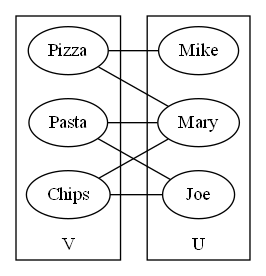

Those who like to eat what Mary likes

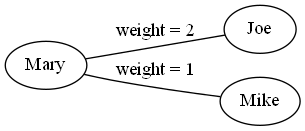

In [29]:
G = nx.Graph()
G.add_edges_from([  ('Mary','Pizza'),
                    ('Mary','Pasta'),
                    ('Mary','Chips'),
                    ('Pizza','Mike'),
                    ('Pasta','Joe'),
                    ('Joe','Chips'),
                ])
U,V = bipartite.sets(G)
visualize(G,clusters=[("U",U),("V",V)])
display(Markdown("Those who like to eat what Mary likes"))
visualize(bipartite.weighted_projected_graph(G,['Mary']))

# Graph-Level Function

Here we will look at some general facts that can be obtained about a graph.

## General Level

Queries that can be obtained upon the graph, without specifying any specific edges or nodes.

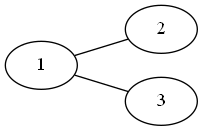

**Adjacency** - All recursive connected nodes: `adjacency = [(1, {2: {}, 3: {}}), (2, {1: {}}), (3, {1: {}})]`

**Degree** - Number of edges adjacent to each node: `degree = [(1, 2), (2, 1), (3, 1)]`

**Order** - Number of nodes in the graph: `order = 3`

**Size** - Number of edges in the graph: `size = 2`

**Degree** - Number of edges adjacent to each node in DegreeView: degree =

DegreeView({1: 2, 2: 1, 3: 1})

In [30]:
G = nx.Graph()
G.add_edges_from([  (1,2),
                    (1,3)
                ])
visualize(G)

display(Markdown("**Adjacency** - All recursive connected nodes: `adjacency = %s`" %
                    list(G.adjacency())
                ))
display(Markdown("**Degree** - Number of edges adjacent to each node: `degree = %s`" % 
                    G.degree()
                ))
display(Markdown("**Order** - Number of nodes in the graph: `order = %s`" % 
                    G.order()
                ))
display(Markdown("**Size** - Number of edges in the graph: `size = %s`" % 
                    G.size()
                ))

display(Markdown("**Degree** - Number of edges adjacent to each node in DegreeView: degree ="))
G.degree()

## Node Level

Queries on the graph relative to input node(s)

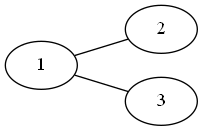

**Neighbours** - Nodes connected to a given node. `neighbours(1) = [2, 3]`

**Nbunch** - Nodes that match those in the input set `nbunch_iter([1,2,5]) = [1, 2]`

In [31]:
G = nx.Graph()
G.add_edges_from([  (1,2),
                    (1,3)
                ])
visualize(G)

display(Markdown("**Neighbours** - Nodes connected to a given node. `neighbours(1) = %s`" 
                    % list(G.neighbors(1))
                ))
display(Markdown("**Nbunch** - Nodes that match those in the input set `nbunch_iter([1,2,5]) = %s`" 
                    % list(G.nbunch_iter([1,2,5]))
                ))

# Clustering Coefficient

## Local Clustering Coefficient

The <b>local clustering coefficient</b> of a node in a graph quantifies how close its neighbours are to being a complete graph.

A more intuitive way of seeing it is that a clustering coefficient for you determines the degree to which your friends are friends among themselves. This is calculated by dividing the number of friendships among your friends, by the potential total of friendships there could be if they were all friends among themselves:

** Current friendships among your friends / # Total potential friendships

Let’s look at a concrete example.

Next we have a graph in which your direct friends are: Joe, Mary, Susan, and Daisy. In turn, Joe is friends with Mary, and Susan is friends with Daisy.

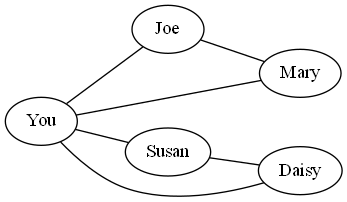

In [32]:
G = nx.Graph()
G.add_edges_from([('You','Joe'),
                  ('You','Mary'),
                  ('You','Susan'),
                  ('You','Daisy'),
                  ('Joe', 'Mary'),
                  ('Susan','Daisy'),
                ])
visualize(G)

Therefore, there are 2 friendships among your friends, but potentially, there could be a total of 6 friendships:

- Joe and Mary (already friends)
- Joe and Susan
- Joe and Daisy
- Susan and Mary
- Susan and Daisy (already friends)
- Mary and Daisy

This results in a coefficient of 2/6 = 1/3 = 0.333333…

In [33]:
nx.clustering(G,'You')

0.3333333333333333

### Local Clustering Coefficient of a node

Can also be calculated using the degree of a node

Local_clustering_coefficient_of_nodeN = (1/2)(degree of nodeN) / (degree of nodeN -1)

## Global Clustering Coefficient

A <b>global clustering coefficient</b> measures the tendency for all the nodes in a graph to cluster together. This is typically measured by calculating either their:

- <b>Average clustering</b>: The local sum of all local clustering results divided by the number of nodes, OR,
- <b>Transitivity</b>: The number of triangles multiplied by three, divided by the number of total triplets.

It is easier to see these approaches in action.

## Inductive Examples

### 2 Nodes, 1 Edge (Not Meaningful)

There are zero values in denominators for transitivity.

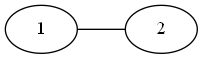

Average Clustering: 0.000000

Transitivity: 0.000000

In [34]:
G = nx.Graph()
G.add_edges_from([(1,2),
                ])
visualize(G)
display(Markdown("Average Clustering: %f" % nx.average_clustering(G)))
display(Markdown("Transitivity: %f" % nx.transitivity(G)))

### 3 Nodes, 2 Edges (Complete Graph-1)
This results in zero values for both approaches.

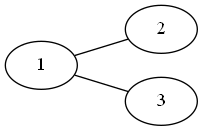

Average Clustering: 0.000000

Transitivity: 0.000000

In [35]:
G = nx.Graph()
G.add_edges_from([(1,2),
                  (1,3),
                ])
visualize(G)
display(Markdown("Average Clustering: %f" % nx.average_clustering(G)))
display(Markdown("Transitivity: %f" % nx.transitivity(G)))

The calculations work as follows.

For average clustering:

clustering(G,1) + clustering(G,2) + clustering (G,3) / nodes(G)

= 0 + 0 + 0 / 3 = 0 / 3 = 0

For transitivity:

3 x triangles / triplets (triplets are 1-2, 2-3, and 3-3)

= 3 x 0 / 3 = 0 / 3 = 0

### 3 Nodes, 3 Edges (Complete Graph)

This is a perfect triangle, and the smallest possible example of 100% clustering using both average clustering and transitivity.

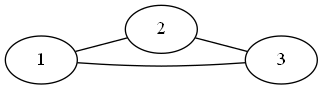

Average Clustering: 1.000000

Transitivity: 1.000000

In [36]:
G = nx.Graph()
G.add_edges_from([(1,2),
                  (1,3),
                  (2,3),
                ])
visualize(G)
display(Markdown("Average Clustering: %f" % nx.average_clustering(G)))
display(Markdown("Transitivity: %f" % nx.transitivity(G)))

The calculations work as follows.

For average clustering:

clustering(G,1) + clustering(G,2) + clustering (G,3) / nodes(G)

= 1 + 1 + 1 / 3 = 3 / 3 = 1

For transitivity:

3 x triangles / triplets (triplets are 1-2, 2-3, and 3-3)

= 3 x 1 / 3 = 3 / 3 = 1

### 4 Nodes, 4 Edges (Complete Graph-2)

Here we are missing two edges to complete the graph and we have one triangle.

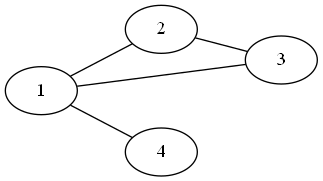

Average Clustering: 0.583333

Transitivity: 0.600000

In [37]:
G = nx.Graph()
G.add_edges_from([(1,2),
                  (1,3),
                  (1,4),
                  (2,3)
                ])
visualize(G)
display(Markdown("Average Clustering: %f" % nx.average_clustering(G)))
display(Markdown("Transitivity: %f" % nx.transitivity(G)))

The calculations work as follows.

For average clustering:

clustering(G,1) + clustering(G,2) + clustering (G,3) + clustering(G,4) / nodes(G)

= 0.333333 + 1 + 1 + 0 / 4 = 2.333333 / 4 = 0.583333

For transitivity:

3 x triangles / triplets (triplets are 1-2, 2-3, 3-3, 1-3, 1-4)

= 3 x 1 / 5 = 3 / 5 = 0.6

### 4 Nodes, 5 Edges (Complete Graph-1)

Here we have all nodes connected except for (2,4). This configuration forms two triangles.

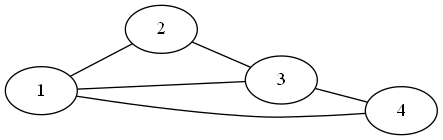

Average Clustering: 0.833333

Transitivity: 0.750000

In [38]:
G = nx.Graph()
G.add_edges_from([(1,2),
                  (1,3),
                  (1,4),
                  (2,3),
                  (3,4)
                ])
visualize(G)
display(Markdown("Average Clustering: %f" % nx.average_clustering(G)))
display(Markdown("Transitivity: %f" % nx.transitivity(G)))

The calculations work as follows.

For average clustering:

clustering(G,1) + clustering(G,2) + clustering (G,3) + clustering(G,4) / nodes(G)

= 0.666666 + 1 + 0.66666 + 1 / 4 = 3.333333 / 4 = 0.833333

For transitivity:

3 x triangles / triplets (triplets are 1-2, 2-3, 3-3, 1-3, 1-4, 3-4, 2-3, and 3-4)

= 3 x 2 / 8 = 6 / 8 = 0.75

### 4 Nodes, 6 Edges (Complete Graph)

Three triangles emerge when connecting all the nodes in the graph.

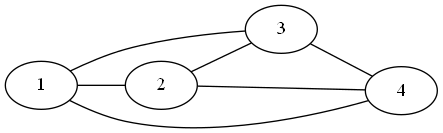

Average Clustering: 1.000000

Transitivity: 1.000000

In [39]:
G = nx.Graph()
G.add_edges_from([(1,2),
                  (1,3),
                  (1,4),
                  (2,3),
                  (3,4),
                  (2,4)
                ])
visualize(G)
display(Markdown("Average Clustering: %f" % nx.average_clustering(G)))
display(Markdown("Transitivity: %f" % nx.transitivity(G)))

The calculations work as follows.

For average clustering:

clustering(G,1) + clustering(G,2) + clustering (G,3) + clustering(G,4) / nodes(G)

= 1 + 1 + 1 + 1 / 4 = 4 / 4 = 1.0

For transitivity:

3 x triangles / triplets (triplets are 1-2, 2-3, 3-3, 1-3, 1-4, 3-4, 2-3, 3-4, and 2-4)

= 3 x 3 / 9 = 9 / 9 = 1.0

Note: There are more triplet combinations than total edge combinations because edges may be counted multiple times in the context of triplets. For example, edge (2,3) is both a triplet in the triangle (1,2,3) as well as a triplet in the triangle (2,3,4).

## Distance

Here we will look at various operations concerning the absolute, relative, and average distance of node(s) in a graph.

We will use a subsection of the London Underground’s network to illustrate distance-wise operations.

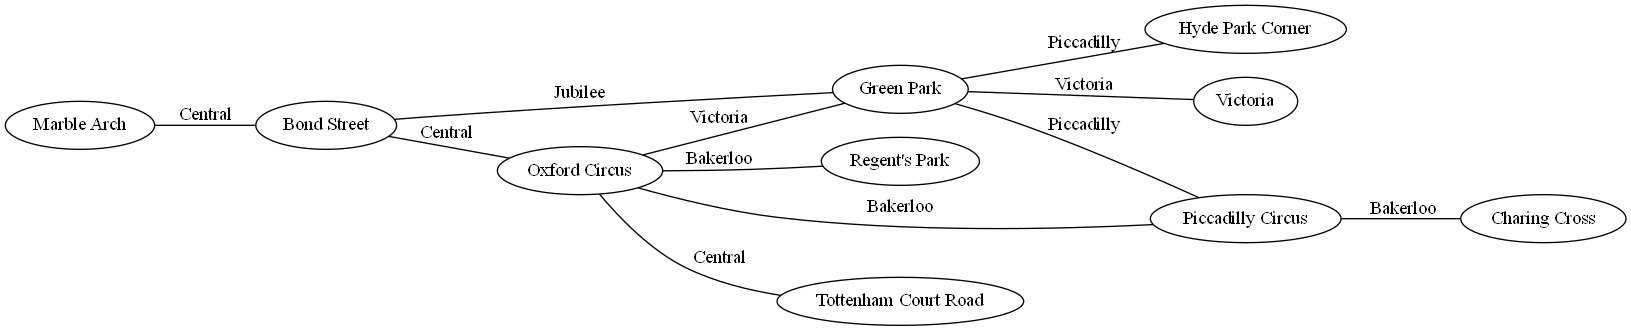

In [40]:
G = nx.Graph()
G.add_edges_from([  ('Marble Arch','Bond Street',{"line" : "Central"}),
                    ('Bond Street','Oxford Circus',{"line" : "Central"}),
                    ('Bond Street','Green Park',{"line" : "Jubilee"}),
                    ('Oxford Circus','Green Park',{"line" : "Victoria"}),
                    ('Oxford Circus','Regent\'s Park',{"line" : "Bakerloo"}),
                    ('Oxford Circus','Piccadilly Circus',{"line" : "Bakerloo"}),
                    ('Oxford Circus','Tottenham Court Road',{"line" : "Central"}),
                    ('Green Park','Hyde Park Corner',{"line" : "Piccadilly"}),
                    ('Green Park','Piccadilly Circus',{"line" : "Piccadilly"}),
                    ('Green Park','Victoria',{"line" : "Victoria"}),
                    ('Piccadilly Circus','Charing Cross',{"line" : "Bakerloo"})
            ])
visualize(G,hide=True)

### Shortest Path

This is the most intuitive graph operation. It provides the number of edges that sit between two nodes.

In the example below we pose the following questions:

Stations in the shortest path: What are the minimum number of tube stations that I need to go through to get from Marble Arch to Charing Cross?

Number of stations in the shortest path: What is the minimum total number of stations that I need to go through?

Lines changes: How many underground lines changes are required?

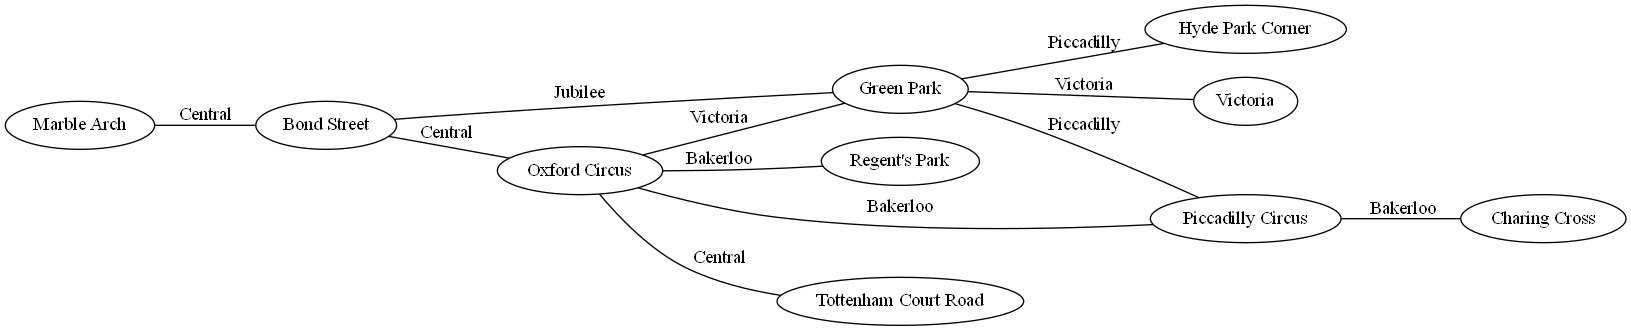

Stations: ['Marble Arch', 'Bond Street', 'Oxford Circus', 'Piccadilly Circus', 'Charing Cross']
Total: 5
Line changes: 2 {'Bakerloo', 'Central'}


In [41]:
visualize(G,hide=True)

# Stations in the shortest path
stations = nx.shortest_path(G,'Marble Arch','Charing Cross')
print("Stations: %s" % stations)

# Number of stations
distance = nx.shortest_path_length(G,'Marble Arch','Charing Cross') + 1
print("Total: %d" % distance)

# Line changes
changes = set([G[stations[i]][stations[i+1]]['line'] for i in range(0,len(stations)-1)])
print("Line changes: %d %s" % (len(changes), changes))


### Breadth-First Search (BFS) vs Depth-First Search (DFS)

The <b>BFS</b> algorithm systematically finds all the surrounding nodes relative the initial node, before moving into the next node, whereas the <b>DFS</b> algorithm follows each node the furthest it can. Here below we see the differences in the algorithms’ search strategy, starting from Oxford Circus.

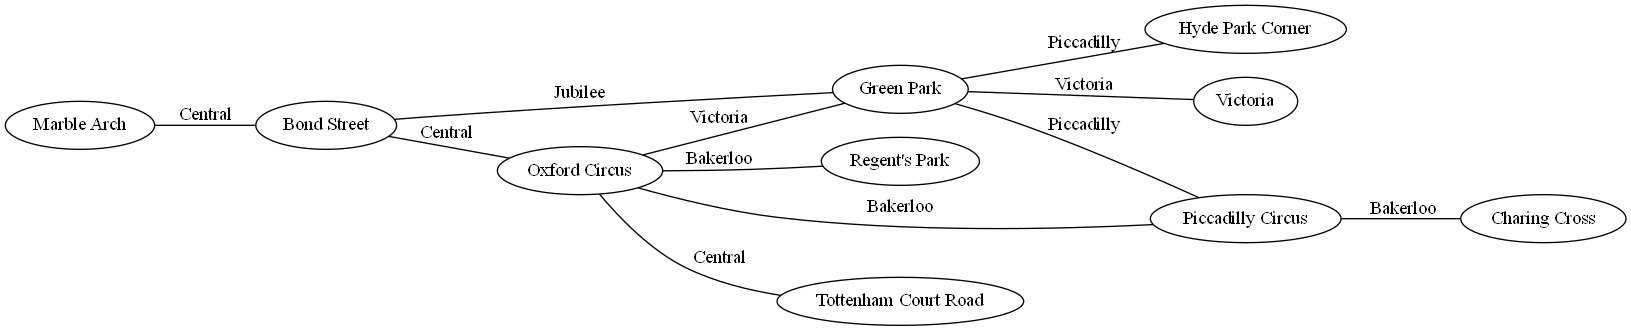

BFS | DFS
----|----
('Oxford Circus', 'Bond Street') | ('Oxford Circus', 'Bond Street') 
('Oxford Circus', 'Green Park') | ('Oxford Circus', "Regent's Park") 
('Oxford Circus', "Regent's Park") | ('Oxford Circus', 'Tottenham Court Road') 
('Oxford Circus', 'Piccadilly Circus') | ('Bond Street', 'Marble Arch') 
('Oxford Circus', 'Tottenham Court Road') | ('Bond Street', 'Green Park') 
('Bond Street', 'Marble Arch') | ('Green Park', 'Hyde Park Corner') 
('Green Park', 'Hyde Park Corner') | ('Green Park', 'Piccadilly Circus') 
('Green Park', 'Victoria') | ('Green Park', 'Victoria') 
('Piccadilly Circus', 'Charing Cross') | ('Piccadilly Circus', 'Charing Cross') 


In [42]:
visualize(G, hide=True)
station = "Oxford Circus"
bfsEdges = list(nx.bfs_tree(G,station).edges())
dfsEdges = list(nx.dfs_tree(G,station).edges())
s  = "BFS | DFS\n"
s += "----|----\n"
for i in range(0,len(bfsEdges)):
    s += "%s | %s \n" % (bfsEdges[i],dfsEdges[i])
display(Markdown(s))

Please note that due to Networkx’s DFS implementation, and the shape of our data set, the DFS search does not quite match the intuition whereby we would expect ('Oxford Circus', 'Bond Street') to be followed by ('Bond Street', 'Marble Arch').

Please also note that weighted models—ours is unweighted—may benefit from a more advanced algorithm like <b>Dijkstra’s</b>.

### Graph-level Distance Stats and Queries

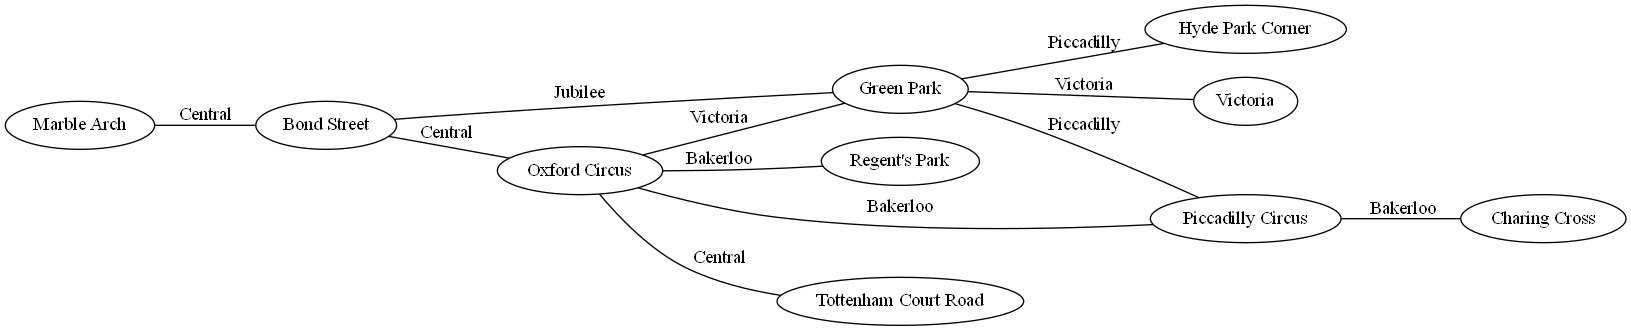

Distance stats: 

* **Average distance** between nodes: 2.11
* **Eccentricity** is the largest distance between node n and all other nodes: {'Marble Arch': 4, 'Bond Street': 3, 'Oxford Circus': 2, 'Green Park': 2, "Regent's Park": 3, 'Piccadilly Circus': 3, 'Tottenham Court Road': 3, 'Hyde Park Corner': 3, 'Victoria': 3, 'Charing Cross': 4}
* **Diameter** is the maximum distance between any pair of nodes: 4.00
* **Radius** is the minimum eccentricity: 2.00
* **Periphery** is the set of nodes that have eccentricity equal to the diameter: ['Marble Arch', 'Charing Cross']
* **Center** is the set of nodes that have eccentricity equal to the radius: ['Oxford Circus', 'Green Park']


In [43]:
visualize(G,hide=True)
s = "Distance stats: \n\n"
s += ("* **Average distance** between nodes: %2.2f\n" % 
        nx.average_shortest_path_length(G)
    )
s += ("* **Eccentricity** is the largest distance between node n and all other nodes: %s\n" % 
        nx.eccentricity(G)
    )    
s += ("* **Diameter** is the maximum distance between any pair of nodes: %2.2f\n" % 
        nx.diameter(G)
    )
s += ("* **Radius** is the minimum eccentricity: %2.2f\n" % 
        nx.radius(G)
    )
s += ("* **Periphery** is the set of nodes that have eccentricity equal to the diameter: %s\n" % 
        nx.periphery(G)
    )
s += ("* **Center** is the set of nodes that have eccentricity equal to the radius: %s\n" % 
        nx.center(G)
    )
nx.center(G)    
display(Markdown(s))

## Robustness

In the previous section we looked at the distance property, both relative to nodes, and at the graph level. Graph robustness concerns the implications of network ‘failure’—in other words, the disconnection, or removal of nodes.

We will use the same graph as before, which is a subsection of the London underground network.

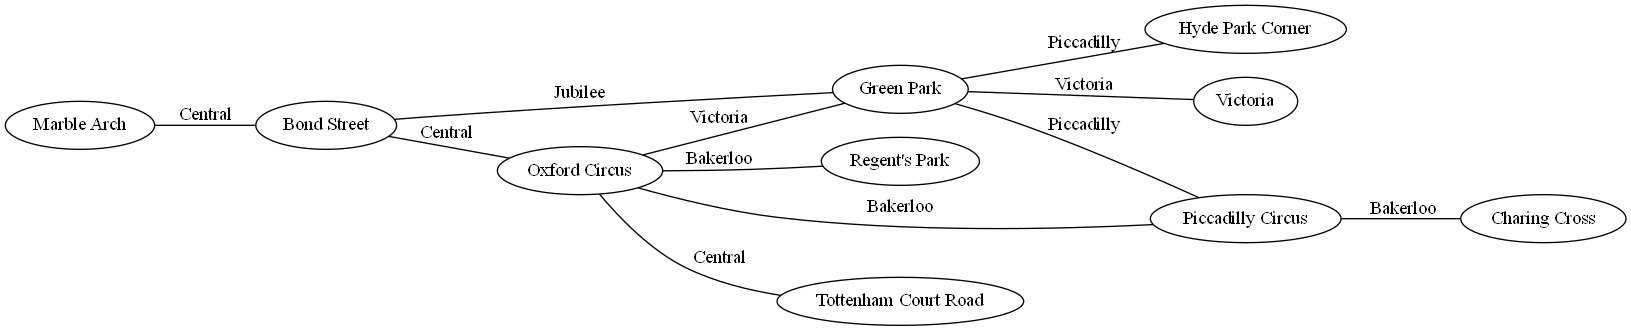

In [44]:
G = nx.Graph()
G.add_edges_from([  ('Marble Arch','Bond Street',{"line" : "Central"}),
                    ('Bond Street','Oxford Circus',{"line" : "Central"}),
                    ('Bond Street','Green Park',{"line" : "Jubilee"}),
                    ('Oxford Circus','Green Park',{"line" : "Victoria"}),
                    ('Oxford Circus','Regent\'s Park',{"line" : "Bakerloo"}),
                    ('Oxford Circus','Piccadilly Circus',{"line" : "Bakerloo"}),
                    ('Oxford Circus','Tottenham Court Road',{"line" : "Central"}),
                    ('Green Park','Hyde Park Corner',{"line" : "Piccadilly"}),
                    ('Green Park','Piccadilly Circus',{"line" : "Piccadilly"}),
                    ('Green Park','Victoria',{"line" : "Victoria"}),
                    ('Piccadilly Circus','Charing Cross',{"line" : "Bakerloo"})
            ])
visualize(G,hide=True)

### Simple Paths

Let’s first understand how commuters use the network. Say that a commuter wants to go from Marble Arch to Charing Cross, what options do they have? We can use all_simple_paths() to answer this question.

Here below, we also sort the list by the number of stations that are required to achieve the destination.

In [45]:
K = sorted([ (len(path),path) for path in nx.all_simple_paths(G,'Marble Arch','Charing Cross') ])
print(K)

print('====================')

S = sorted(nx.all_simple_paths(G,'Marble Arch','Charing Cross'))
print(f"All simple paths from source to destination in the network are:\n{S}")
print(f'The type of variable S is: {type(S)}')
print(f'The length of the variable S is: {len(S)}. Or, there are {len(S)} members in S')

print('====================')

for member in S:
#     print(member)
#     print(len(member))
    print(f"Lengths and paths of all simple paths from source to destination in the network are:\n\
    {len(member), member}")
    
print('====================')

(print(sorted((len(member),member) for member in S)))

# All of these individual steps are done in one line at the very top of this cell!!!!

[(5, ['Marble Arch', 'Bond Street', 'Green Park', 'Piccadilly Circus', 'Charing Cross']), (5, ['Marble Arch', 'Bond Street', 'Oxford Circus', 'Piccadilly Circus', 'Charing Cross']), (6, ['Marble Arch', 'Bond Street', 'Green Park', 'Oxford Circus', 'Piccadilly Circus', 'Charing Cross']), (6, ['Marble Arch', 'Bond Street', 'Oxford Circus', 'Green Park', 'Piccadilly Circus', 'Charing Cross'])]
All simple paths from source to destination in the network are:
[['Marble Arch', 'Bond Street', 'Green Park', 'Oxford Circus', 'Piccadilly Circus', 'Charing Cross'], ['Marble Arch', 'Bond Street', 'Green Park', 'Piccadilly Circus', 'Charing Cross'], ['Marble Arch', 'Bond Street', 'Oxford Circus', 'Green Park', 'Piccadilly Circus', 'Charing Cross'], ['Marble Arch', 'Bond Street', 'Oxford Circus', 'Piccadilly Circus', 'Charing Cross']]
The type of variable S is: <class 'list'>
The length of the variable S is: 4. Or, there are 4 members in S
Lengths and paths of all simple paths from source to destinat

### Graph Disconnection

Let’s stay that your are TFL (Transport for London) administrator, and striking personnel are planning to leave some stations unattended—i.e., they must be closed during the strike.

Which station(s) would cause the most disruption, if closed?

In [46]:
# For our particular subsection of the London Underground network, closing one station only is all that is required to 
# prevent commuters from reaching their destinations:

print(f'The number of stations of nodes that must be closed to prevent commuters from reaching their destinations is:\n\
{nx.node_connectivity(G)}')

The number of stations of nodes that must be closed to prevent commuters from reaching their destinations is:
1


We can find out a single station that can disconnect the network—this is not the only one

In [47]:
# Which is this station?

print(f'One station that when closed causes the most disruption,\
or prevent the most commuters from reaching Charing Cross is:\n {nx.minimum_node_cut(G)}')

One station that when closed causes the most disruption,or prevent the most commuters from reaching Charing Cross is:
 {'Piccadilly Circus'}


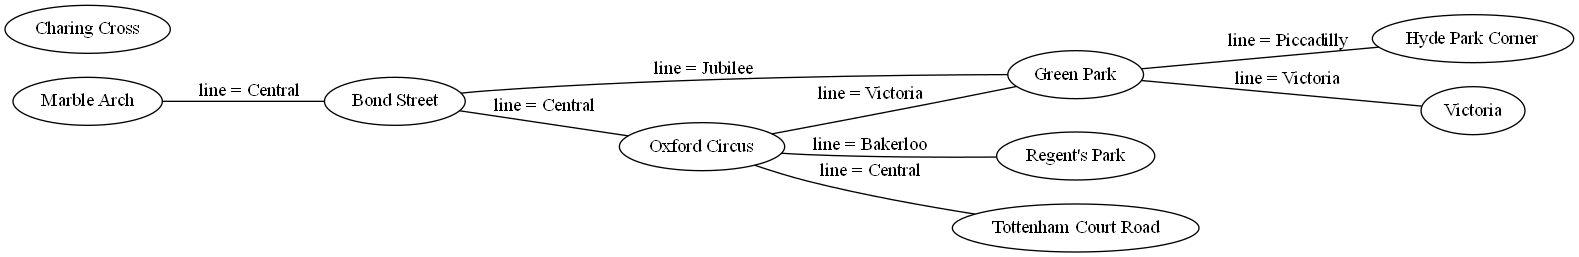

In [48]:
G_strike = G.copy()

G_strike.remove_nodes_from(nx.minimum_node_cut(G))
visualize(G_strike)

Now, what about if we wanted to reason about the disruption caused for a commuter who travels from Marble Arch, to Charing Cross. To get the answer, we just need to provide the nodes that represent these two stations to minimum_node_cut()

In [49]:
print(f"The minimum nu ber of nodes that can be removed to cause maximum disruption to commuters from Marble Arch to Charing Cross is:\n\
{nx.minimum_node_cut(G,'Marble Arch','Charing Cross')}")

The minimum nu ber of nodes that can be removed to cause maximum disruption to commuters from Marble Arch to Charing Cross is:
{'Piccadilly Circus'}


Now consider a scenario in which engineering works are about to take place in one of the network’s tunnels (represented by <b>edges</b>).

What is the minimum number of segments (or edges) required to disconnect the network?

In [50]:
print(nx.edge_connectivity(G))

1


In [51]:
# And which are the segment(s)?

print(nx.minimum_edge_cut(G))

{('Victoria', 'Green Park')}


What about the edges that would disrupt a commuter who needs to go from Marble Arch to Charing Cross?

In [52]:
print(nx.minimum_edge_cut(G,'Marble Arch','Charing Cross'))

{('Piccadilly Circus', 'Charing Cross')}


<i><b>As we can see, the above functions return the first node and edges, respectively, that are minimally required to disrupt the network—i.e, disconnect the graph, rather than those that would provoke the most disruption overall.</b></i>

## Centrality

Centrality concerns the ranking of nodes in a graph depending on their position. We will use the following graph to discuss various centrality metrics.

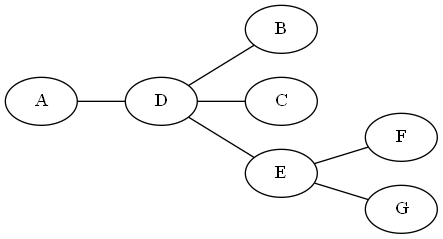

In [53]:
G = nx.Graph()
G.add_edges_from([('A','D'),
                  ('B','D'),
                  ('C','D'),
                  ('D','E'),
                  ('E','F'),
                  ('E','G')])
visualize(G)

### Degree Centrality (Undirected Graphs)

Degree centrality scores each node relative to their degree—i.e., their number of connections—over the number of nodes, subtracting the node in hand from the count.

The formula, applied to Node_E, works as follows:

Degree Centrality(G,N) = Degree(N) / #(G)-1

= 3 / 7-1 = 3 / 6 = 0.5

where, #(G) is the number of nodes in G

In [54]:
# According to the formula above

degree_centrality_for_nodeE = nx.degree(G,'E') / (nx.number_of_nodes(G) - 1)
print(f'The degree centrality of nodeE calculated using the formula is: {degree_centrality_for_nodeE}')

# For all nodes:
example_dict={}
for nd in sorted(list(nx.nodes(G))):
    print((nd, nx.degree(G,nd) / (nx.number_of_nodes(G) - 1)))  
    
# All the above can be done with
print(f'The degree centrality score of each node in network is:\n{nx.degree_centrality(G)}')

The degree centrality of nodeE calculated using the formula is: 0.5
('A', 0.16666666666666666)
('B', 0.16666666666666666)
('C', 0.16666666666666666)
('D', 0.6666666666666666)
('E', 0.5)
('F', 0.16666666666666666)
('G', 0.16666666666666666)
The degree centrality score of each node in network is:
{'A': 0.16666666666666666, 'D': 0.6666666666666666, 'B': 0.16666666666666666, 'C': 0.16666666666666666, 'E': 0.5, 'F': 0.16666666666666666, 'G': 0.16666666666666666}


### Degree Centrality (Directed Graphs)

In the case of directed graph, the direction of the edges—let’s call them arrows in this section—is meaningful so we need to decide, for each node, whether to count either the inward arrows (those that point to the node in hand), or the outward arrows (those that originate from the node in hand).

The formula is like before where we count the degree divided by the number of nodes, subtracting the node in hand from the count. What changes is that the degree is calculated either for the inward or the outward arrows. Let’s see examples for both cases.

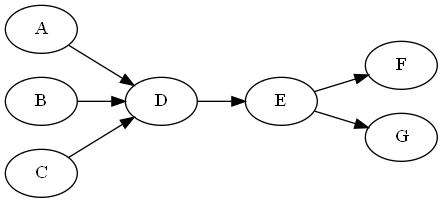

In [55]:
G = nx.DiGraph()
G.add_edges_from([('A','D'),
                  ('B','D'),
                  ('C','D'),
                  ('D','E'),
                  ('E','F'),
                  ('E','G')])
visualize(G)

#### In-Degree

If we are counting the inward arrows, then we are calculating the In-degree. In the case of node_D we have 3 inward arrows, and the total number of nodes is 7. So, its score is: 3 / (7-1) = 3 / 6 = 0.5.

In [56]:
inDegree = nx.in_degree_centrality(G)
print(inDegree)

{'A': 0.0, 'D': 0.5, 'B': 0.0, 'C': 0.0, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}


#### Out-Degree

If we are counting the outward arrows, then we are calculating the Out-degree. In the case of D we have 1 inward arrow, and the total number of nodes is 7. So, its score is: 1 / (7-1) = 1 / 6 = 0.166666….

In [57]:
outDegree = nx.out_degree_centrality(G)
print(outDegree)

{'A': 0.16666666666666666, 'D': 0.16666666666666666, 'B': 0.16666666666666666, 'C': 0.16666666666666666, 'E': 0.3333333333333333, 'F': 0.0, 'G': 0.0}


### Closeness Centrality (Undirected Graphs)

<b>Closeness centrality</b>—normalised unless otherwise stated–of a node is the average length of the shortest path between the node and all other nodes in the graph. Whereas degree only considers the direct edges connected to the node in hand, closeness considers the distance to all the other nodes in the graph. Let’s first come back to our undirected graph:

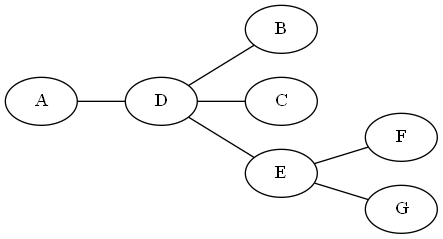

In [58]:
G = nx.Graph()
G.add_edges_from([('A','D'),
                  ('B','D'),
                  ('C','D'),
                  ('D','E'),
                  ('E','F'),
                  ('E','G')])
visualize(G)

In [59]:
# Let’s take the example of node D. Here we see the distance to each other node in the graph
nodal_distances_to_D = set(nx.shortest_path_length(G,'D').items())
print(nodal_distances_to_D)

# We now sum up the distances and use it as the denominator—the nominator is the number of nodes minus one.
total_distance = sum(nx.shortest_path_length(G,'D').values())

number_of_nodes = G.number_of_nodes()
closenessCentrality = (number_of_nodes - 1) / total_distance

print(f'The total length of each shortest path from a node to all other nodes is: {total_distance}')
print(f'The number of nodes in the graph is: {number_of_nodes}')
print(f'The Closeness Centrality of a node to all other nodes in the graph is: {closenessCentrality}')

{('E', 1), ('F', 2), ('C', 1), ('B', 1), ('G', 2), ('A', 1), ('D', 0)}
The total length of each shortest path from a node to all other nodes is: 8
The number of nodes in the graph is: 7
The Closeness Centrality of a node to all other nodes in the graph is: 0.75


In [60]:
# Here are the closeness centralities for all nodes int the graphvosiap
closenessCentralities = nx.closeness_centrality(G)
print(f'The Closeness Centralities for all nodes in the graph are: {closenessCentralities}')

The Closeness Centralities for all nodes in the graph are: {'A': 0.46153846153846156, 'D': 0.75, 'B': 0.46153846153846156, 'C': 0.46153846153846156, 'E': 0.6666666666666666, 'F': 0.42857142857142855, 'G': 0.42857142857142855}


### Closeness Centrality (Directed Graphs)

Closeness centrality in the case of directed graph is calculated by default using the <i>inward</i> distance to each node. For the <i>outward</i> instance, the graph should be reversed using <b><i>G.reverse()</i></b>.

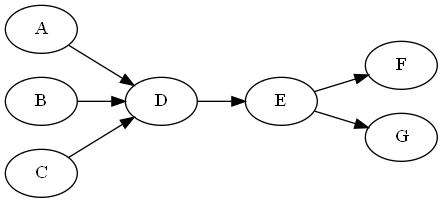

The inward centrality of the Graph is:
 {'A': 0.0, 'D': 0.5, 'B': 0.0, 'C': 0.0, 'E': 0.38095238095238093, 'F': 0.34722222222222227, 'G': 0.34722222222222227}
The outward centrality of the Graph is:
 {'A': 0.2962962962962963, 'D': 0.3, 'B': 0.2962962962962963, 'C': 0.2962962962962963, 'E': 0.3333333333333333, 'F': 0.0, 'G': 0.0}


In [61]:
G = nx.DiGraph()
G.add_edges_from([('A','D'),
                  ('B','D'),
                  ('C','D'),
                  ('D','E'),
                  ('E','F'),
                  ('E','G')])
visualize(G)
print(f'The inward centrality of the Graph is:\n {nx.closeness_centrality(G)}')
print(f'The outward centrality of the Graph is:\n {nx.closeness_centrality(G.reverse())}')

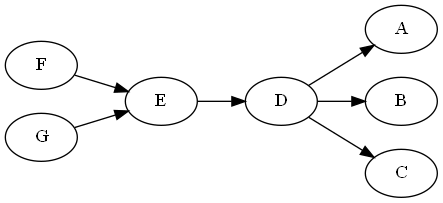

In [62]:
visualize(nx.reverse(G))
# Look at this graph! It is the reverse, i.e. the directed vertices are all pointing in the opposite direction!!!!!

### Betweenness

Betweenness measures the degree to which each node is in the path of other nodes in a graph. Let’s start with our sample undirected graph

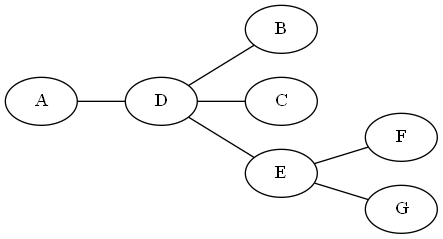

{'A': 0.0, 'D': 12.0, 'B': 0.0, 'C': 0.0, 'E': 9.0, 'F': 0.0, 'G': 0.0}

In [63]:
G = nx.Graph()
G.add_edges_from([('A','D'),
                  ('B','D'),
                  ('C','D'),
                  ('D','E'),
                  ('E','F'),
                  ('E','G')])
visualize(G)
nx.betweenness_centrality(G,normalized=False) # The scores are not normalized.

Let’s consider betweenness for node D. The denormalized score is 12, which is calculated by summing up, for each combination of nodes, excluding D, the difference between all the possible shortest paths, and those paths that go through D:

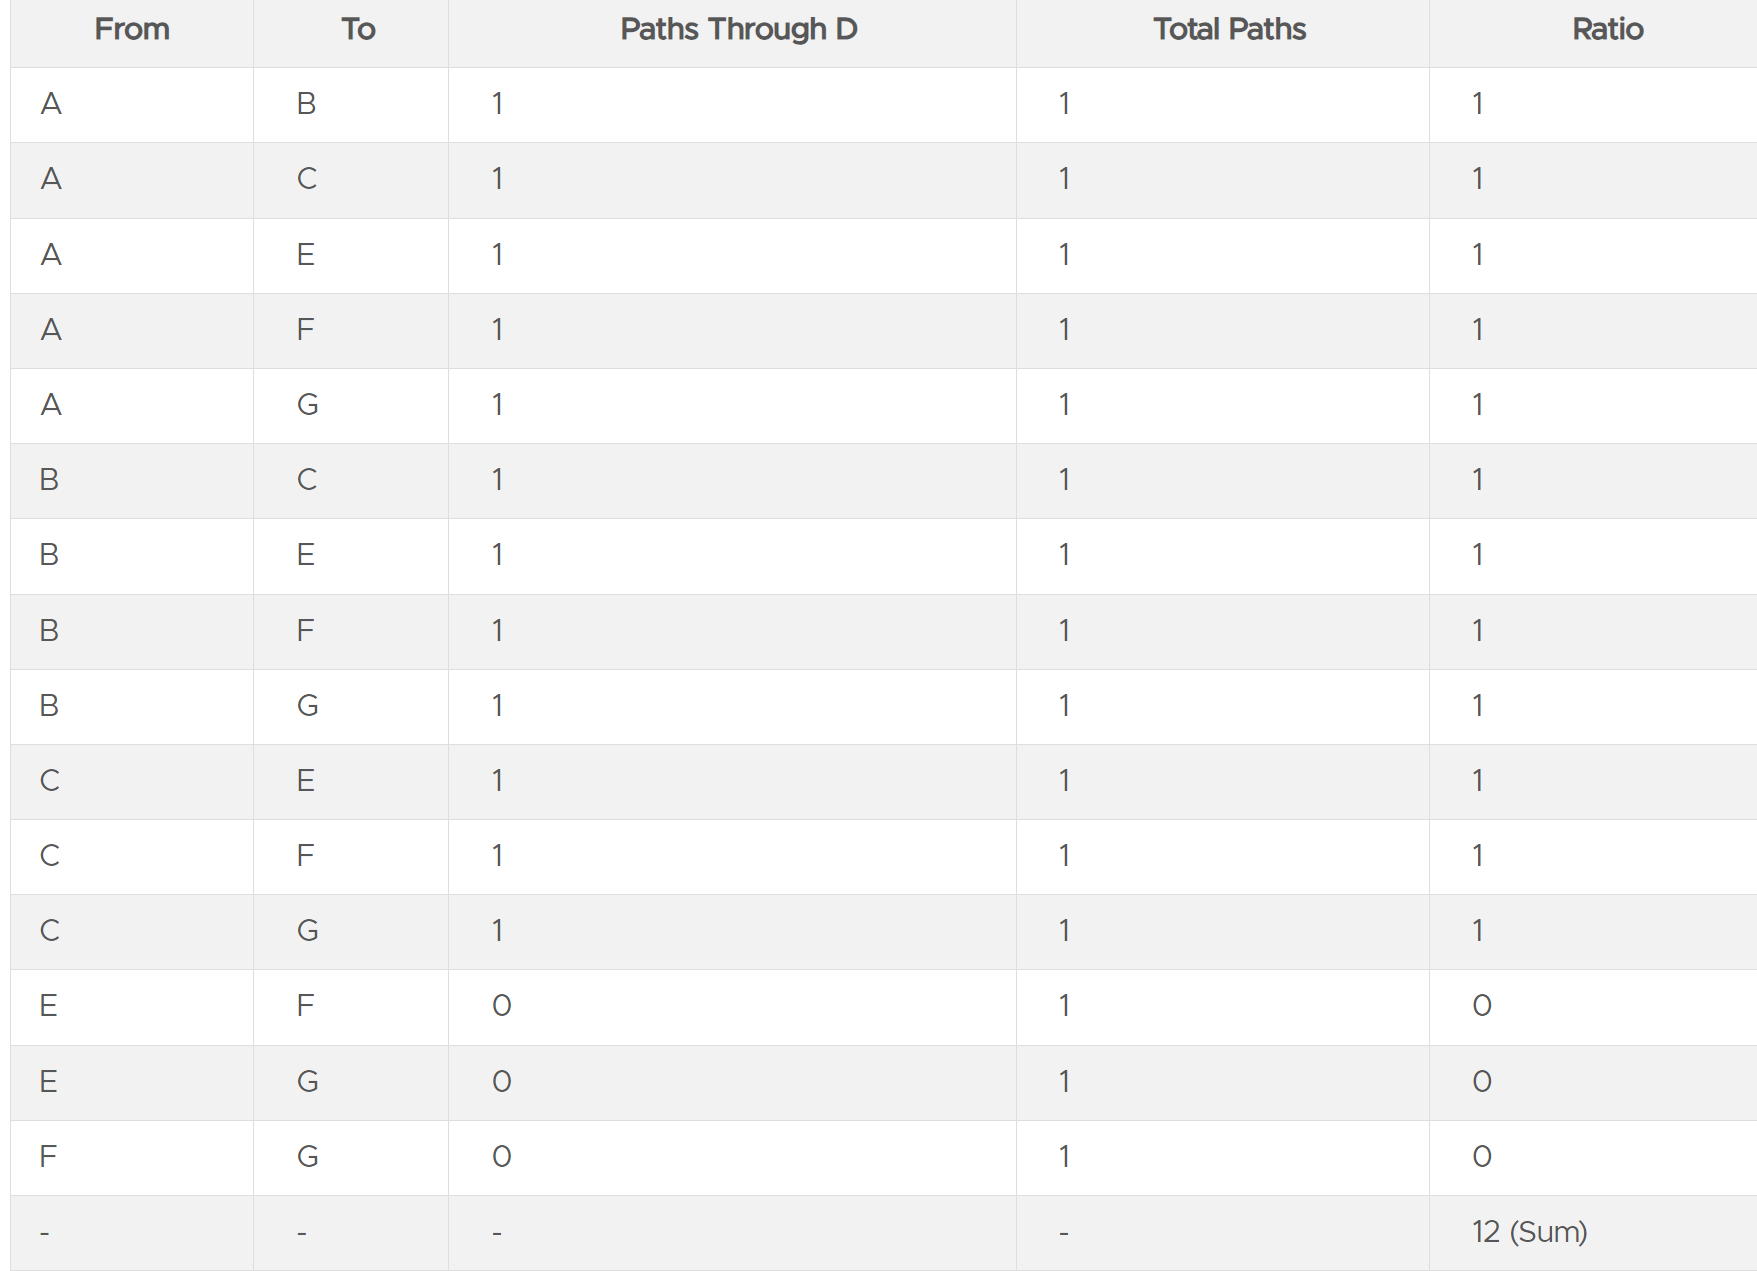

Scores are presented in a normalised fashion, by default, which consists on dividing the score by the number of combinations of nodes, barring the node in hand itself:

For example, for D, this results in:

Betweenness(D) /(1/2 * (N-2) * (N-1)) = 12 / (0.5 * 5 * 6) = 12 / 15 = 0.8

(Divide the un-normalized Betweenness by a combination of nodes that ignores the node in question), i.e

(unnormalized Betweenness) / (total_number_of_nodes -1)C2 (2 because there is one pair (startnode -> endnode)

In [64]:
# We can extract the normalised scores just by removing the normalised argument—this is the default
nx.betweenness_centrality(G)

{'A': 0.0, 'D': 0.8, 'B': 0.0, 'C': 0.0, 'E': 0.6, 'F': 0.0, 'G': 0.0}

#### Edge Betweenness

Betweenness centrality can also be calculated relative to edges, rather than nodes

In [65]:
nx.edge_betweenness_centrality(G)

{('A', 'D'): 0.2857142857142857,
 ('D', 'B'): 0.2857142857142857,
 ('D', 'C'): 0.2857142857142857,
 ('D', 'E'): 0.5714285714285714,
 ('E', 'F'): 0.2857142857142857,
 ('E', 'G'): 0.2857142857142857}

#### Performance Notes

Calculating betweenness has a performance of <i>O(n^3)</i>: it gets exponentially slower with larger number of nodes.

One approach is to use sampling by passing the argument <b>k</b> to <b>betweenness_centrality()</b> so that the paths are calculated only for k nodes rather than all of them.

Another approach is to specify a subset of nodes for the calculation, in which case an alternative function called <b>betweenness_centrality_subset()</b> is provided.

### Page Rank

PageRank (PR) is Larry Page’s original patented algorithm (https://en.wikipedia.org/wiki/PageRank), used by Google Search to rank web pages. It works by counting the number and quality of links to a page, to determine how important the website is. It is based on the assumption that more important websites are likely to receive more links from other websites.

PageRank uses a directed graph as a data structure whereby the nodes are the websites, and the edges are the links.

#### Basic Algorithm

The basic algorithm gives each node an initial importance equal to <i>1 / # Nodes</i>. Then, with each iteration of the algorithm, the nodes with inward arrows are given the importance of the node from which each inward arrow originates, divided by the number of outward arrows that node has. The idea is that the importance conferred by a node is diluted by the number of outward arrows it has.

Let us get started with a sample graph in which the initial importance is 0.2 which is 1 / 5, given that we have 5 nodes in total:

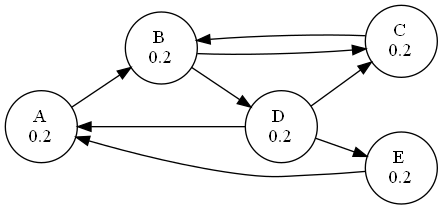

In [10]:
G = nx.DiGraph()
# Sample graph by Daniel Romero
G.add_edges_from([('A','B'),
                  ('B','C'),
                  ('B','D'),
                  ('C','B'),
                  ('D','C'),
                  ('D','A'),
                  ('D','E'),
                  ('E','A'),
                ])
def initial_nodes():
    importance = 1 / G.number_of_nodes()
    return { n : { "importance" : importance } for n in G.nodes() }
nx.set_node_attributes(G,values=initial_nodes())
visualize(G,hide=True)

Now, let us do one first iteration of the algorithm, and see what new values we get for each node. Note in the table below, how the value of each node is calculated by summing up the importance contributed by each inward node, which in turn is diluted by the out degree (the number of outgoing arrows) from that node.


i | Node |  Inward Node  | Importance | Out Degree| Influence
--|------|---------------|------------|-----------|----------
1 | A 0.20 (Old) | D | 0.20 | 3.00 | 0.20/3.00 = 0.07 
1 | A 0.20 (Old) | E | 0.20 | 1.00 | 0.20/1.00 = 0.20 
1 | A 0.27 (D+E) |-|- |- |-
1 | B 0.20 (Old) | A | 0.20 | 1.00 | 0.20/1.00 = 0.20 
1 | B 0.20 (Old) | C | 0.20 | 1.00 | 0.20/1.00 = 0.20 
1 | B 0.40 (A+C) |-|- |- |-
1 | C 0.20 (Old) | B | 0.20 | 2.00 | 0.20/2.00 = 0.10 
1 | C 0.20 (Old) | D | 0.20 | 3.00 | 0.20/3.00 = 0.07 
1 | C 0.17 (B+D) |-|- |- |-
1 | D 0.20 (Old) | B | 0.20 | 2.00 | 0.20/2.00 = 0.10 
1 | D 0.10 (B) |-|- |- |-
1 | E 0.20 (Old) | D | 0.20 | 3.00 | 0.20/3.00 = 0.07 
1 | E 0.07 (D) |-|- |- |-


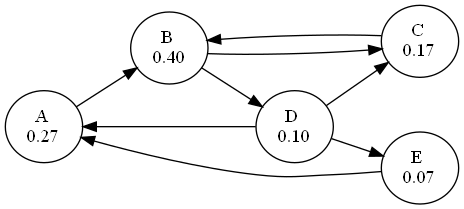

In [11]:
def simplePageRank(max_iter=1,show=False):
    nodes = initial_nodes()
    s = "\n"
    s +=  "i | Node |  Inward Node  | Importance | Out Degree| Influence\n"
    s +=  "--|------|---------------|------------|-----------|----------\n"
    for i in range(1,max_iter+1):
        new_nodes = {}
        for n in nodes.keys():
            sum = 0.0
            for in_node,_ in G.in_edges(nbunch=n):
                s += "%d " % i # Iteration
                s += "| %s %2.2f (Old) " % (n,nodes[n]['importance'])
                s += "| %s " % in_node
                in_node_importance = nodes[in_node]['importance']
                in_node_outward_degree = G.out_degree(nbunch=in_node)
                in_node_influence = in_node_importance / in_node_outward_degree
                sum = sum + in_node_influence
                s += "| %2.2f " % in_node_importance
                s += "| %2.2f " % in_node_outward_degree
                s += "| %2.2f/%2.2f = %2.2f " % (in_node_importance,in_node_outward_degree,in_node_influence)
                s += "\n"
           
            new_nodes[n] = { 'importance' : sum if sum > 0.0 else nodes[n]['importance']}
 
            in_nodes = "+".join([ n[0] for n in G.in_edges(nbunch=n) ]) if sum > 0.0 else "No Inward Nodes"
            s += "%i | %s %2.2f (%s) |-|- |- |-\n" % (i,n,new_nodes[n]['importance'],in_nodes)
        nodes = new_nodes
    if show == True:
        display(Markdown(s))
    return {  k : { "importance" : "%2.2f" % v['importance']} for k,v in nodes.items() }

nx.set_node_attributes(G,values=simplePageRank(max_iter=1,show=True))
visualize(G,hide=True)

Let us now run same algorithm two times. What is interesting is that in the second run, the importance contributed by each inward node is no longer the initial value of 0.2, but the values calculated in the first iteration.


i | Node |  Inward Node  | Importance | Out Degree| Influence
--|------|---------------|------------|-----------|----------
1 | A 0.20 (Old) | D | 0.20 | 3.00 | 0.20/3.00 = 0.07 
1 | A 0.20 (Old) | E | 0.20 | 1.00 | 0.20/1.00 = 0.20 
1 | A 0.27 (D+E) |-|- |- |-
1 | B 0.20 (Old) | A | 0.20 | 1.00 | 0.20/1.00 = 0.20 
1 | B 0.20 (Old) | C | 0.20 | 1.00 | 0.20/1.00 = 0.20 
1 | B 0.40 (A+C) |-|- |- |-
1 | C 0.20 (Old) | B | 0.20 | 2.00 | 0.20/2.00 = 0.10 
1 | C 0.20 (Old) | D | 0.20 | 3.00 | 0.20/3.00 = 0.07 
1 | C 0.17 (B+D) |-|- |- |-
1 | D 0.20 (Old) | B | 0.20 | 2.00 | 0.20/2.00 = 0.10 
1 | D 0.10 (B) |-|- |- |-
1 | E 0.20 (Old) | D | 0.20 | 3.00 | 0.20/3.00 = 0.07 
1 | E 0.07 (D) |-|- |- |-
2 | A 0.27 (Old) | D | 0.10 | 3.00 | 0.10/3.00 = 0.03 
2 | A 0.27 (Old) | E | 0.07 | 1.00 | 0.07/1.00 = 0.07 
2 | A 0.10 (D+E) |-|- |- |-
2 | B 0.40 (Old) | A | 0.27 | 1.00 | 0.27/1.00 = 0.27 
2 | B 0.40 (Old) | C | 0.17 | 1.00 | 0.17/1.00 = 0.17 
2 | B 0.43 (A+C) |-|- |- |-
2 | C 0.17 (Old) | B | 0.40 | 2.00 | 0.40/2.00 = 0.20 
2 | C 0.17 (Old) | D | 0.10 | 3.00 | 0.10/3.00 = 0.03 
2 | C 0.23 (B+D) |-|- |- |-
2 | D 0.10 (Old) | B | 0.40 | 2.00 | 0.40/2.00 = 0.20 
2 | D 0.20 (B) |-|- |- |-
2 | E 0.07 (Old) | D | 0.10 | 3.00 | 0.10/3.00 = 0.03 
2 | E 0.03 (D) |-|- |- |-


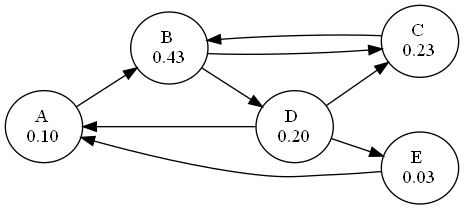

In [5]:
nx.set_node_attributes(G,values=simplePageRank(max_iter=2,show=True))
visualize(G,hide=True)

If we run infinite iterations, the importance of each node will eventually converge. We don’t need to run that many iterations. Let us do just 100

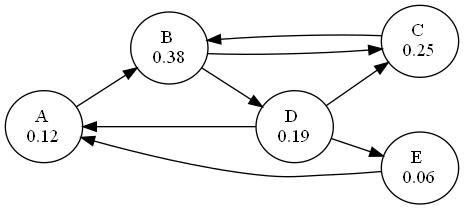

In [6]:
nx.set_node_attributes(G,values=simplePageRank(max_iter=50,show=False))
visualize(G,hide=True)

In [7]:
# We can see that Neworkx’s own pagerank() function provides similar results
nx.pagerank(G,alpha=1.0)

{'A': 0.0, 'C': 0.0, 'B': 0.0, 'D': 0.5, 'E': 0.5}

#### Scaling (Alpha Parameter)

In the last section we saw that we passed the argument alpha=1.0 to pagerank(), why? It turns out that the basic algorithm has a problem. Consider this graph:

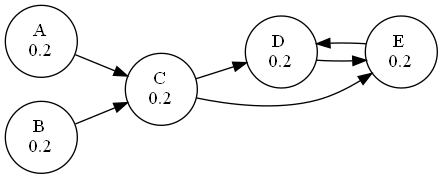

In [12]:
G = nx.DiGraph()
G.add_edges_from([('A','C'),
                  ('B','C'),
                  ('C','D'),
                  ('C','E'),
                  ('D','E'),
                  ('E','D'),
                ])
nx.set_node_attributes(G,values=initial_nodes()) # Function initial_nodes() is defined earlier in PageRank section.
visualize(G,hide=True)

If we run the basic page rank algorithm many times over—100000 times in the example below—we see that D and E have a reinforcing effect whereby their importance ends up reducing, comparatively, that of {A,B,C}:

In [13]:
nx.set_node_attributes(G,values=simplePageRank(max_iter=100000,show=False))
visualize(G,hide=True)

KeyboardInterrupt: 

The results are equivalent to Network’x pagerank() when using alpha=1.0:

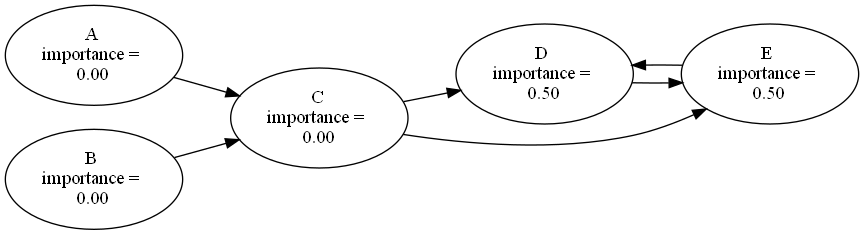

In [14]:
nx.set_node_attributes(G,
    values={ k : { "importance" : "%2.2f" % v} 
                for k,v in nx.pagerank(G,alpha=1.0).items()}
    )
visualize(G)

The parameter <b>alpha</b> works as a damping parameter, in the sense that it adds some randomness to the otherwise, static relationship between nodes. It therefore prevents cycles like <b>{D,E}</b> from reducing—disproportionally—the importance of nodes that are not involved in cyclical relationships. The closer alpha is to zero, the more randomness is added. By default, <b>pagerank()</b> assumes <b>alpha=0.85</b>, so a 15% dampening effect is added. Let us see the difference:

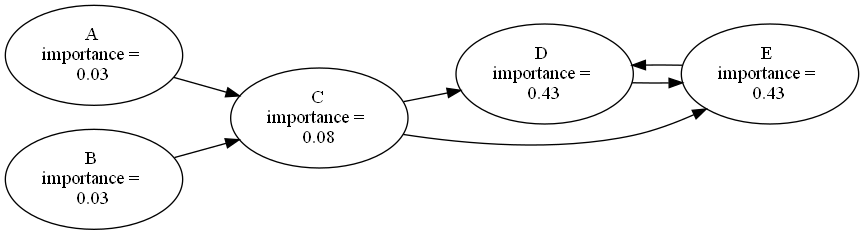

In [15]:
nx.set_node_attributes(G,
    values={ k : { "importance" : "%2.2f" % v} 
                for k,v in nx.pagerank(G).items()} # alpha=0.85 by default
    )
visualize(G)

Here we see that the importance of <b>{A,B,C}</b> hasn’t been watered down to zero, when <b>alpha</b> was <b>1.0</b>. But, what happens if we set <b>alpha</b> to <b>0.0</b>? In this case, the edge/arrows become pretty much meaningless—all nodes have the same importance:

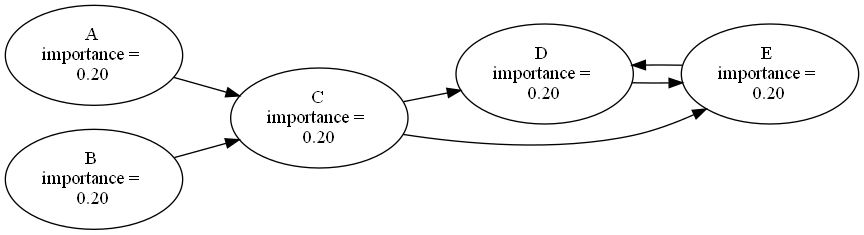

In [16]:
nx.set_node_attributes(G,
    values={ k : { "importance" : "%2.2f" % v} 
                for k,v in nx.pagerank(G,alpha=0.0).items()} 
    )
visualize(G)

### HITS